In [3]:
from csv import reader
import numpy as np
import func
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pygrib


def plot_rv(model_name):
    lat_s = 11
    lat_n = 50
    lon_w = 121
    lon_e = 160

    fig = plt.figure(figsize=(10, 10))
    proj = ccrs.PlateCarree()  # 正距円筒図法を指定
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    ax = plt.axes(projection=proj)
    ax.coastlines(resolution='10m')
    ax.set_extent((lon_w, lon_e, lat_s, lat_n), proj)  # 緯度経度の範囲を指定

    levels = np.arange(0, 100, 50)  # 等値線の間隔を指定

    CS = ax.contour(lons, lats, RV_100, levels, transform=proj)
    ax.clabel(CS, fmt='%.0f')  # 等値線のラベルを付ける
    ax.set_title("100y Return Value (Hs) " + model_name)
    plt.show()

    grbs = pygrib.open('/Volumes/HDCL-UT/MRI-AGCM3.2H_WW3_wave/HPA_YS/Jpn_30min.1979010100.grib')
    lats, lons = grbs[1].latlons()
    RV_100 = np.zeros((79, 79))
    with open('../csv2/' + model_name + '_CNT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        CNT = int(list(csv_reader)[0][0])
    with open('../csv2/' + model_name + '_POT.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
        for index in range(79 * 79):
            if index % 100 == 0:
                print(index // 100, "/", 62)
            POT = POT_ALL[index]
            # データ数を削減する
            s = []
            for i in range(len(POT)):
                s.append(float(POT[i]))
            s = sorted(s, reverse=True)
            if len(s) < 50:
                RV_100[index // 79][index % 79] = 0
            else:
                s = s[:50]
                thr = s[-1]
                RV = func.lwm_gpd(data=s, error=[0.05], thr=thr, period=25, RP=100, n=CNT, n0=len(s), con=0.95, img_name=model_name)
                RV_100[index // 79][index % 79] = RV

    return

0 / 62
xi: -1.4646464646464645 ~ 1.5656565656565657
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: -0.3933272115090296 σ: 0.9915780521595776 RV: 11.267219647276036
xi: -0.5555555555555554 ~ 2.878787878787879
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: 0.24232221201918192 σ: 0.8630320735087295 RV: 20.815969222352827
xi: -0.3535353535353538 ~ 2.5757575757575752
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: 0.20865217834914773 σ: 0.822065916106352 RV: 19.399909003208858
xi: -0.45454545454545503 ~ 3.0808080808080813
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: 0.3310886644219976 σ: 1.0322243616323072 RV: 26.38511848411004
xi: -0.15151515151515138 ~ 2.9797979797979792
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: 0.35455565758596064 σ: 0.6936472348070255 RV: 22.23323139165465
xi: -0.2525252525252526 ~ 3.787878787878787
n0, n, n0 / n 50 219143 0.00022816152010331155
最尤推定 ξ: 0.5229058259361288 σ: 0.7720839491962951 RV: 33.64104399037919
xi: -0.25

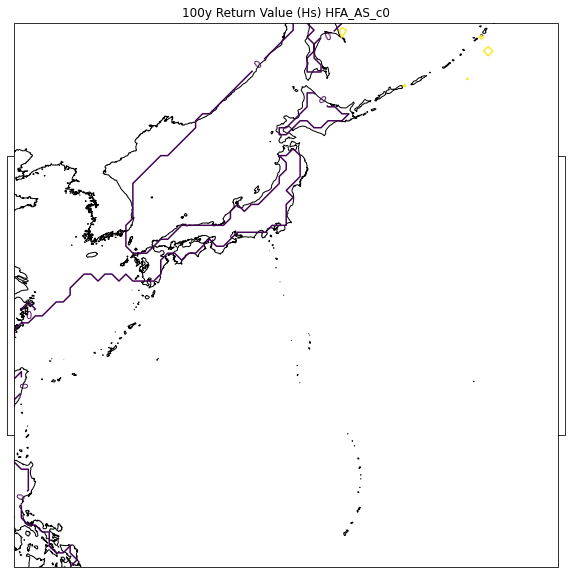

In [2]:
plot_rv("HFA_AS_c0")

In [4]:
[1, 2, 3][-1]

3